# Classification - Project 3
# Multiple Sclerosis Disease





In [2]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing the required Libraries
import pandas as pd 
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import loguniform
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectFromModel

from sklearn.pipeline import Pipeline
from sklearn.exceptions import FitFailedWarning

#### About Dataset

Dataset column descriptions

ID: Patient identifier (int)

Age: Age of the patient (in years)

Schooling: time the patient spent in school (in years)

Gender: 1=male, 2=female 

Breastfeeding: 1=yes, 2=no, 3=unknown

Varicella: 1=positive, 2=negative, 3=unknown

Initial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor and other

Mono _or_Polysymptomatic: 1=monosymptomatic, 2=polysymptomatic, 3=unknown

Oligoclonal_Bands: 0=negative, 1=positive, 2=unknown

LLSSEP: 0=negative, 1=positive

ULSSEP:0=negative, 1=positive

VEP:0=negative, 1=positive

BAEP: 0=negative, 1=positive

Periventricular_MRI:0=negative, 1=positive

Cortical_MRI: 0=negative, 1=positive

Infratentorial_MRI:0=negative, 1=positive

Spinal_Cord_MRI: 0=negative, 1=positive

initial_EDSS:1=Low, 2=Medium, 3=High

final_EDSS:1=Low, 2=Medium, 3=High

Group: 1=CDMS, 2=non-CDMS

Definition of some of the technical/medical terms [ref. from wikipedia if not stated explicitly].
Varicella : Another name for Chickenpox, or chicken pox, is a highly contagious disease caused by the initial infection with varicella zoster virus (VZV), a member of the herpesvirus family.

BAEP: In human neuroanatomy, brainstem auditory evoked potentials (BAEPs), also called brainstem auditory evoked responses (BAERs), are very small auditory evoked potentials in response to an auditory stimulus, which are recorded by electrodes placed on the scalp.

VEP: Visual evoked potential (VEP) is an evoked potential elicited by presenting light flash or pattern stimulus which can be used to confirm damage to visual pathway including retina, optic nerve, optic chiasm, optic radiations, and occipital cortex.

Oligoclonal bands: Oligoclonal bands (OCBs) are bands of immunoglobulins that are seen when a patient's blood serum, or cerebrospinal fluid (CSF) is analyzed. They are used in the diagnosis of various neurological and blood diseases. Oligoclonal bands are present in the CSF of more than 95% of patients with clinically definite multiple sclerosis.

SSEP : Somatosensory evoked potentials (SSEP) are recorded from the central nervous system following stimulation of peripheral nerves. ULSSEP (upper limb SSEP), LLSSEP (lower limb SSEP)

EDSS: The Expanded Disability Status Scale (EDSS) is a method of quantifying disability in multiple sclerosis and monitoring changes in the level of disability over time. It is widely used in clinical trials and in the assessment of people with MS. 2

Ideas for notebooks:

*What symptoms/factors are better predictors of MS?

*Classify the two groups based of the other independent features.

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\priya\Downloads\Integrify Machine Learning Project\Individual ML Project\Multiple Sclerosis Disease\conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')
df

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


## Descriptive statistics

In [5]:
# Displaying information about the DataFrame
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [6]:
df = df.drop('Unnamed: 0', axis=1)  #dropping 'Unnamed: 0' column

In [7]:
# descriptive statistics of the DataFrame
df.describe()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [8]:
df.nunique()

Gender                      2
Age                        48
Schooling                  12
Breastfeeding               3
Varicella                   3
Initial_Symptom            15
Mono_or_Polysymptomatic     3
Oligoclonal_Bands           3
LLSSEP                      2
ULSSEP                      2
VEP                         2
BAEP                        2
Periventricular_MRI         2
Cortical_MRI                2
Infratentorial_MRI          2
Spinal_Cord_MRI             2
Initial_EDSS                3
Final_EDSS                  3
group                       2
dtype: int64

In [9]:
df['group'].value_counts()

2    148
1    125
Name: group, dtype: int64

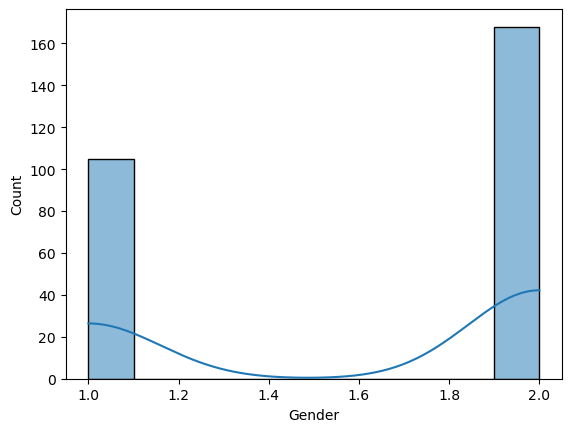

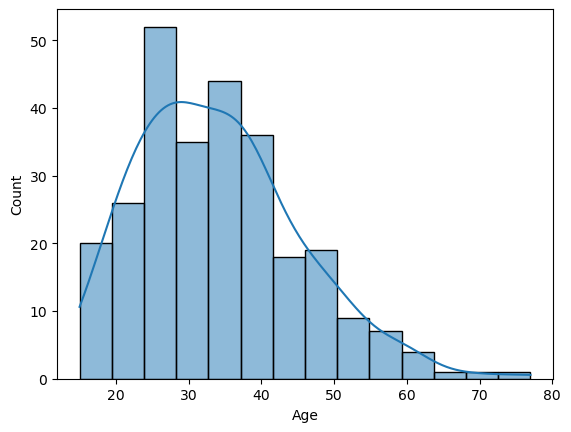

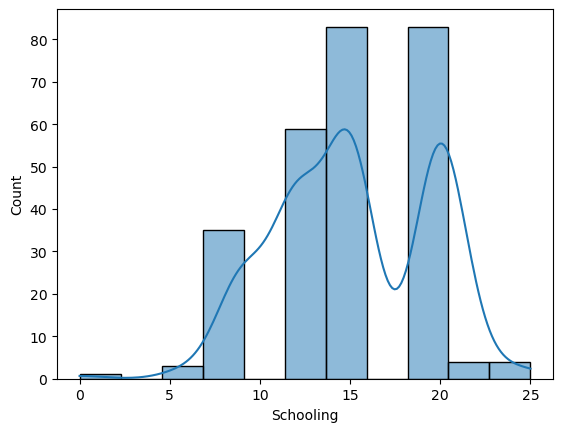

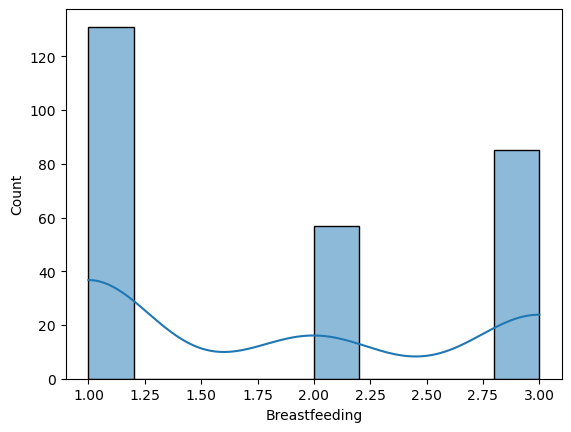

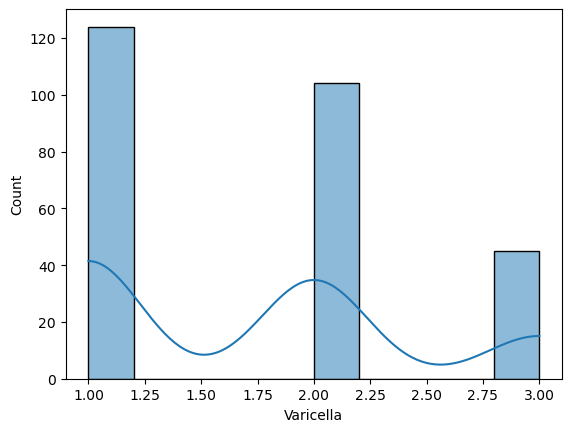

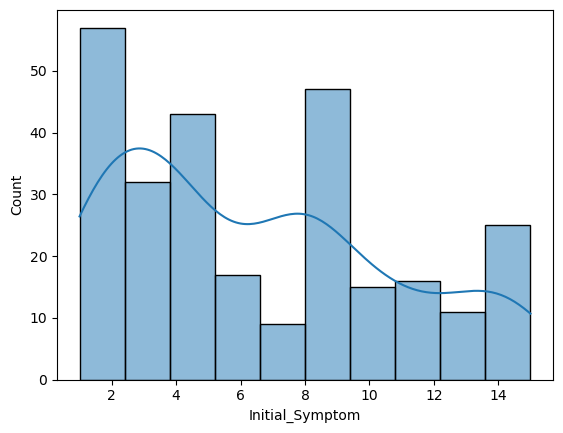

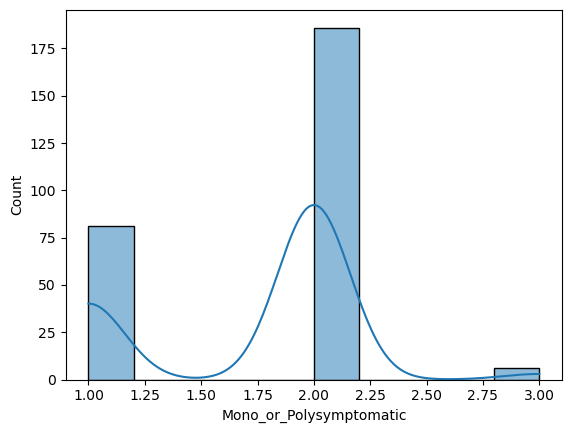

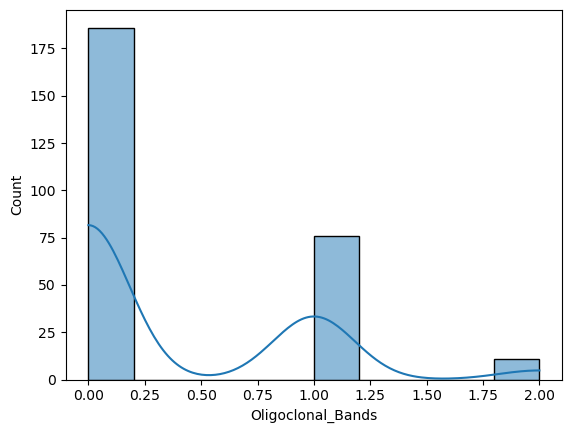

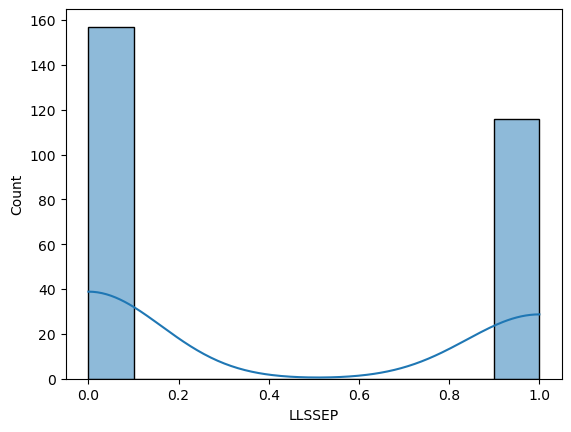

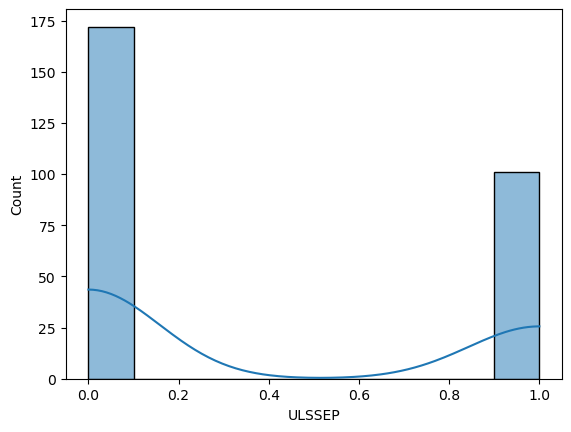

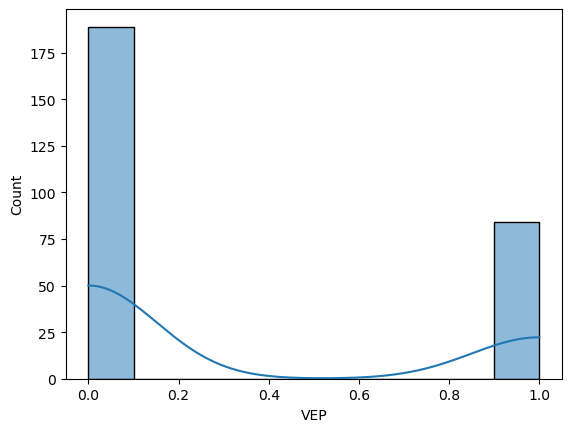

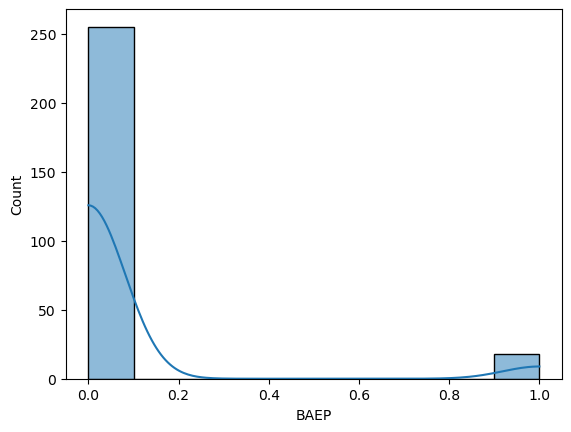

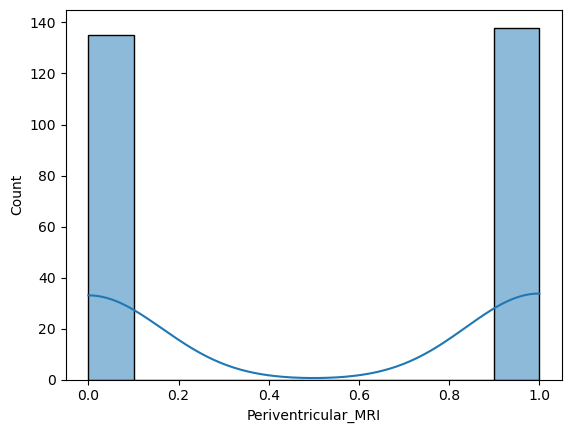

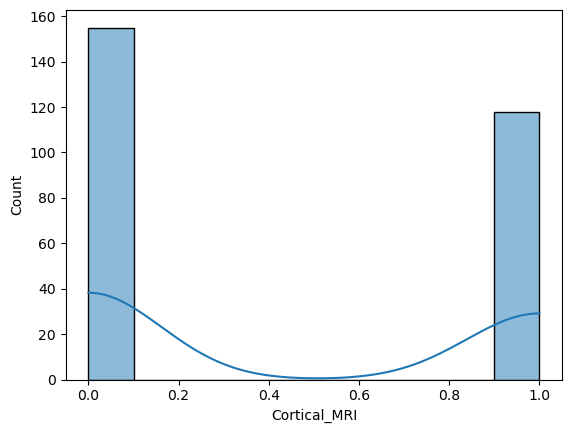

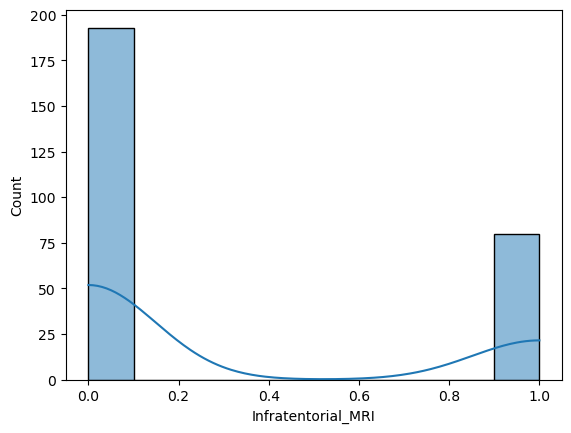

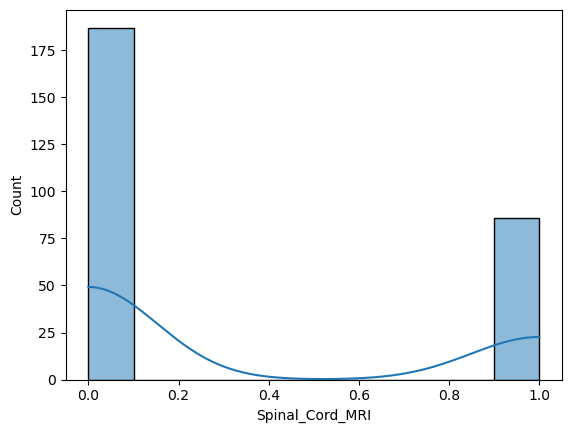

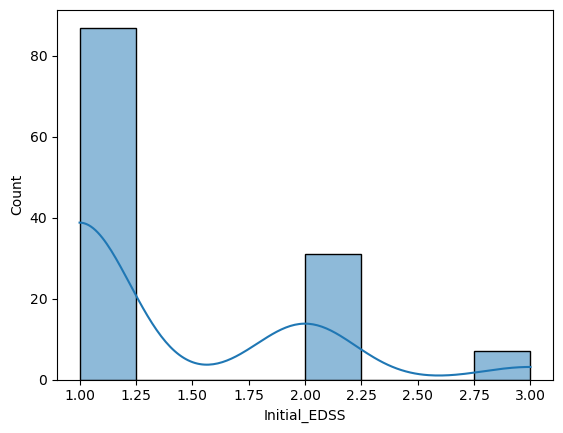

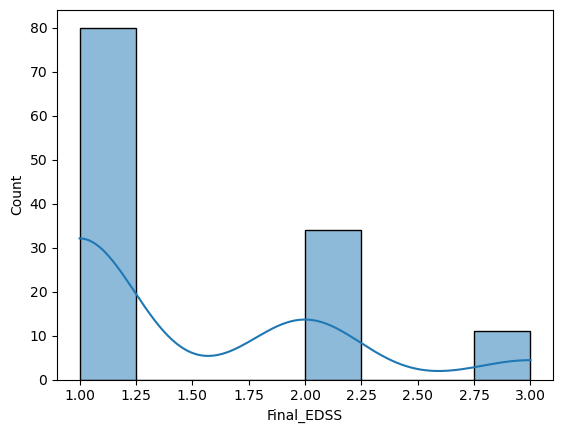

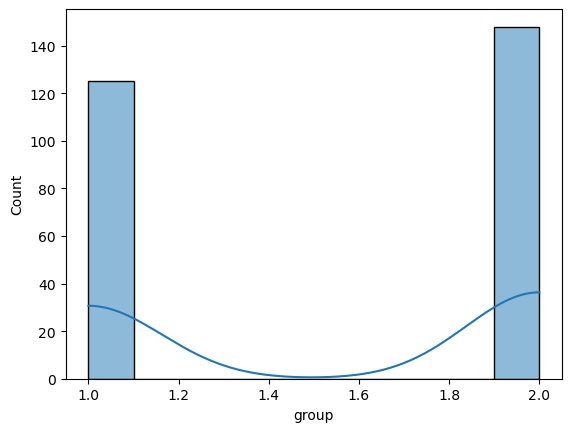

In [11]:
# Plotting histograms for each column to see the frequency distribution of the columns
for i in list(df.columns):
    sns.histplot(df[i], kde = True)
    plt.show()

# Correlation Matrix

<Axes: >

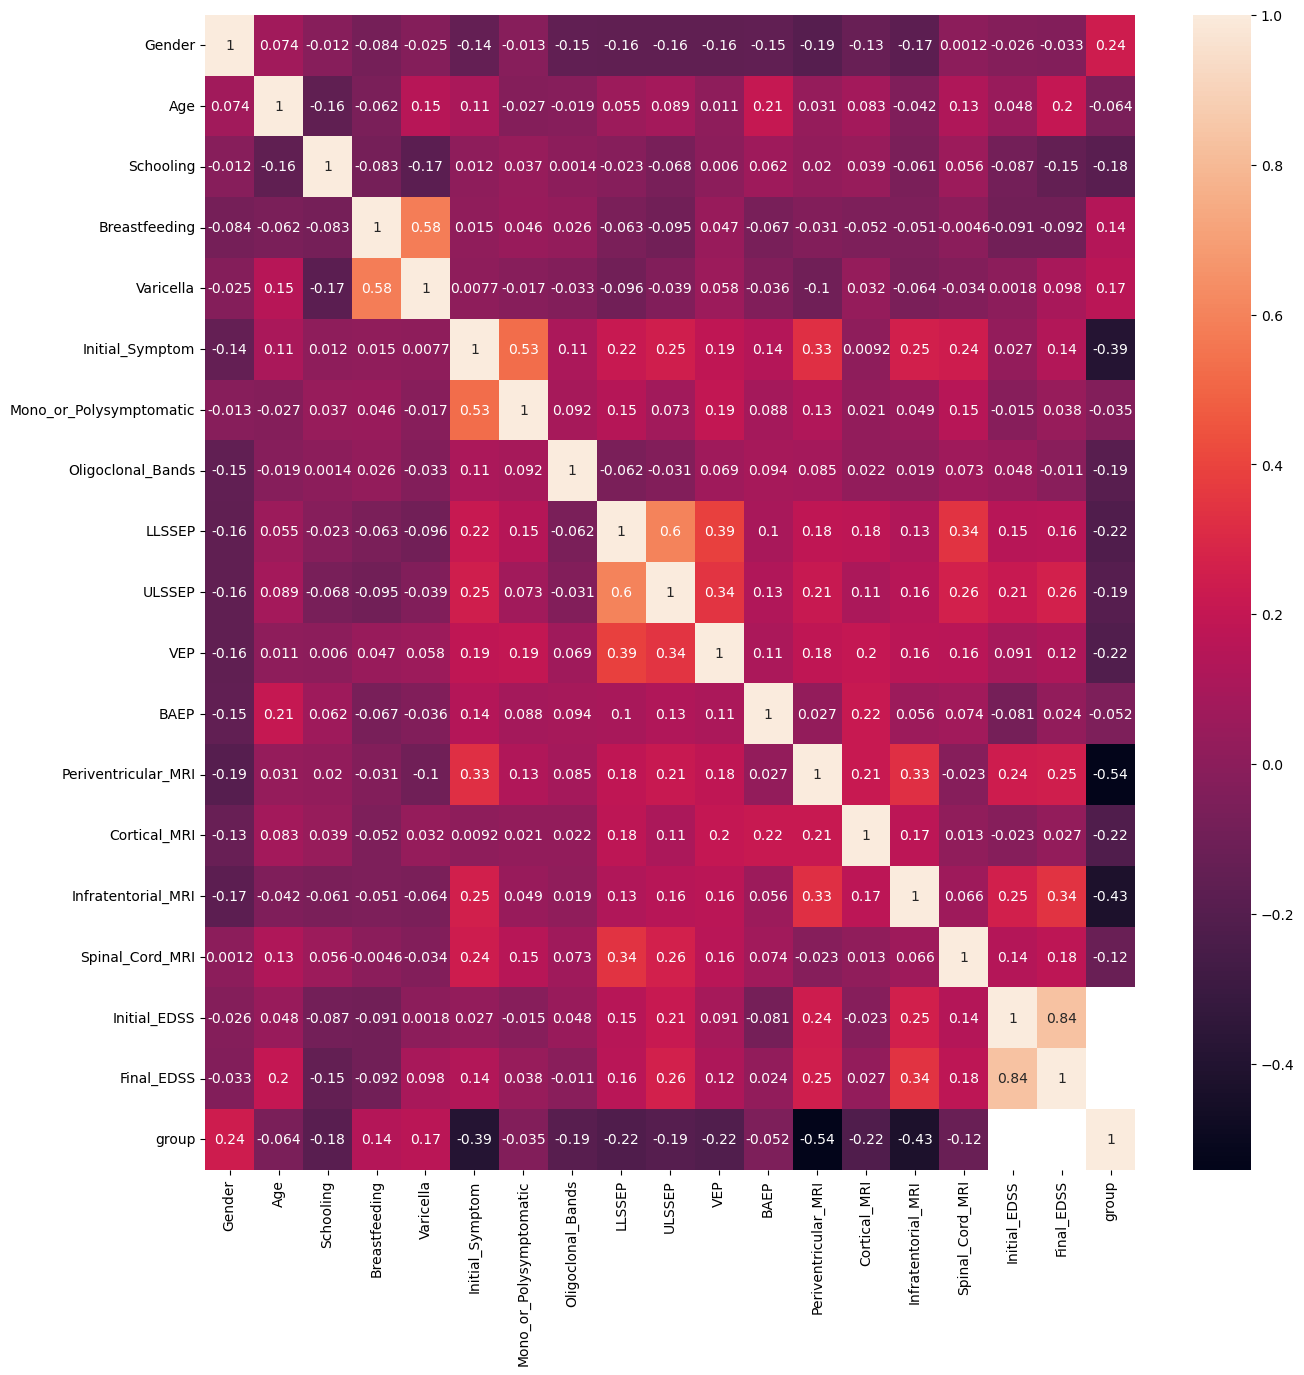

In [12]:
plt.figure(figsize=(15, 15))
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True)

In [1]:
#This visualization helps in understanding the trend or pattern of each column's data using its default dataframe index .
#This helps visualize how each column's values change.
import plotly.graph_objects as go

# Initialize an empty list to store line plots
line_plot = []

# Iterate over each column in the dataframe
for col in df.columns:
    # Create a scatter trace for each column
    line_trace = go.Scatter(
        y=df[col],  # Data for y-axis is the column values
        mode='lines',  # Plotting mode as lines
        name=col  # Name of the trace as the column name
    )
    # Append the trace to the line_plot list
    line_plot.append(line_trace)

# Define layout for the plot
layout = go.Layout(title="Line Plot")

# Create a figure using the line_plot traces and layout
fig = go.Figure(data=line_plot, layout=layout)

# Display the figure
fig.show()


NameError: name 'df' is not defined

In [14]:
# visualizing the distribution of values in each column of the DataFrame using boxplots,
# where each boxplot represents one column, showing its median, quartiles, and potential outliers.
box_traces = []
for col in df.columns:
    box_trace = go.Box(
        y=df[col],
        name=col
    )
    box_traces.append(box_trace)

layout = go.Layout(title="Box Plot")
fig = go.Figure(data=box_traces, layout=layout)
fig.show()




## Data Imputation

In [15]:
# Calculate the number and percentage of missing values for each column
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values/len(df))*100
Check_missing_values = pd.concat([missing_values, percentage_missing_values], axis=1, keys= ['Missing values', '% Missing'])
print(Check_missing_values)

                         Missing values  % Missing
Final_EDSS                          148  54.212454
Initial_EDSS                        148  54.212454
Schooling                             1   0.366300
Initial_Symptom                       1   0.366300
Gender                                0   0.000000
BAEP                                  0   0.000000
Spinal_Cord_MRI                       0   0.000000
Infratentorial_MRI                    0   0.000000
Cortical_MRI                          0   0.000000
Periventricular_MRI                   0   0.000000
ULSSEP                                0   0.000000
VEP                                   0   0.000000
Age                                   0   0.000000
LLSSEP                                0   0.000000
Oligoclonal_Bands                     0   0.000000
Mono_or_Polysymptomatic               0   0.000000
Varicella                             0   0.000000
Breastfeeding                         0   0.000000
group                          

In [16]:
# Setting a threshold for the percentage of missing values
threshold = 5

# Getting the columns to remove based on the threshold
remove_column = percentage_missing_values[percentage_missing_values > threshold].index.tolist()

# Creating a subset DataFrame without the columns to be removed
subset_df = df[df.columns[~df.columns.isin(remove_column)]]
# subset_df = df.drop(remove_column, axis = 1)

# Interpolating missing values in the subset DataFrame
subset_df  = subset_df.interpolate()
subset_df

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [17]:
# Calculate quartiles, interquartile range, lower bound, and upper bound for outlier detection
Q1_ = subset_df.quantile(0.25)
Q3_ = subset_df.quantile(0.75)
IQR_ = Q3_ - Q1_

lower_bound = Q1_ - 1.5 * IQR_
upper_bound = Q3_ + 1.5 * IQR_

# Find outliers in the subset DataFrame
outliers = pd.DataFrame()
for col in subset_df.columns:
    column_outliers = subset_df[(subset_df[col] < lower_bound[col]) | (subset_df[col] > upper_bound[col])]
    outliers = pd.concat([outliers, column_outliers])

print(pd.concat([lower_bound, upper_bound], axis=1, keys=['Lower Bound', 'Upper Bound']))
print()
print("Outliers:")
print(outliers)

                         Lower Bound  Upper Bound
Gender                          -0.5          3.5
Age                              2.5         62.5
Schooling                        0.0         32.0
Breastfeeding                   -2.0          6.0
Varicella                       -0.5          3.5
Initial_Symptom                 -6.0         18.0
Mono_or_Polysymptomatic         -0.5          3.5
Oligoclonal_Bands               -1.5          2.5
LLSSEP                          -1.5          2.5
ULSSEP                          -1.5          2.5
VEP                             -1.5          2.5
BAEP                             0.0          0.0
Periventricular_MRI             -1.5          2.5
Cortical_MRI                    -1.5          2.5
Infratentorial_MRI              -1.5          2.5
Spinal_Cord_MRI                 -1.5          2.5
group                           -0.5          3.5

Outliers:
     Gender  Age  Schooling  Breastfeeding  Varicella  Initial_Symptom  \
39        1   6

In [18]:
outliers_ = subset_df[(subset_df["Age"] < lower_bound["Age"]) | (subset_df["Age"] > upper_bound["Age"])]
outliers_

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
39,1,65,20.0,1,2,8.0,2,1,1,1,1,1,1,1,1,1,1
123,1,70,9.0,3,3,14.0,2,0,1,1,0,0,1,1,1,0,1
272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,2


In [19]:
### Implementing New dataframe by using certain features and Data Visualization
visualization_df = subset_df.copy()
visualization_df[visualization_df.columns] = visualization_df[visualization_df.columns].astype('Int64')
gender = {1:'Male', 2: 'Female'}
breastfeeding = {1: 'yes', 2:'no', 3:'unknown'}
varicella = {1 : 'positive', 2: 'negative', 3: 'unknown'}
group = {1: 'CDMS' , 2: 'Non-CDMS' }

In [20]:
visualization_df['Gender'] = visualization_df['Gender'].map(gender)
visualization_df['Breastfeeding'] = visualization_df['Breastfeeding'].map(breastfeeding)
visualization_df['Varicella'] = visualization_df['Varicella'].map(varicella)
visualization_df['group'] = visualization_df['group'].map(group)

visualization_df

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,Male,34,20,yes,positive,2,1,0,1,1,0,0,0,1,0,1,CDMS
1,Male,61,25,unknown,negative,10,2,1,1,0,1,0,0,0,0,1,CDMS
2,Male,22,20,unknown,positive,3,1,1,0,0,0,0,0,1,0,0,CDMS
3,Female,41,15,yes,positive,7,2,1,0,1,1,0,1,1,0,0,CDMS
4,Female,34,20,no,positive,6,2,0,1,0,0,0,1,0,0,0,CDMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Female,31,8,unknown,positive,9,2,0,0,0,0,0,0,0,0,0,Non-CDMS
269,Male,21,15,unknown,unknown,5,2,1,0,0,0,0,0,0,0,1,Non-CDMS
270,Female,19,12,unknown,unknown,13,2,0,1,1,1,0,0,0,0,1,Non-CDMS
271,Female,32,15,unknown,unknown,15,2,1,1,1,1,0,1,1,1,0,Non-CDMS


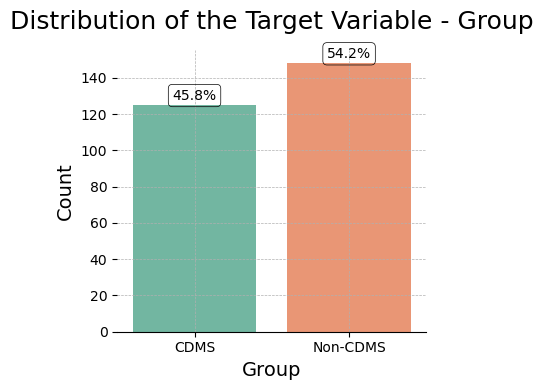

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def count_plot(data, feature, title, hue=True):
    """
    Custom count plot with percentage display and enhanced features.
    """
    plt.figure(figsize=(4, 4))  # Adjusted figure size for better visualization
    
    total = float(len(data))
    
    # Set the color palette (using 'Set2' as an example; you can choose others)
    palette = 'Set2'  
    
    if hue:
        ax = sns.countplot(x=data[feature], hue=data['group'], palette=palette)
    else:
        ax = sns.countplot(x=data[feature], palette=palette)
    
    # Display percentages above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 3, 
            '{:1.1f}%'.format((height / total) * 100), 
            ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5),
            fontsize=10  # Adjust font size for better visibility
        )
    
    # Set title and adjust font size and position
    ax.set_title(title, fontsize=18, pad=15)
    
    # Add grid lines and remove spines for better readability
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    sns.despine(right=True)
    sns.despine(left=True)
    
    # Set axis labels
    plt.xlabel(feature.capitalize(), fontsize=14)
    plt.ylabel("Count", fontsize=14)
    
    # Add legend if hue is provided
    if hue:
        plt.legend(title="Group", title_fontsize='large', fontsize='medium')
    
    # Adjust layout for better visualization
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Call the updated count_plot function
count_plot(
    data=visualization_df,
    feature="group",
    title="Distribution of the Target Variable - Group",
    hue=False  # Set to True if you want to include hue
)


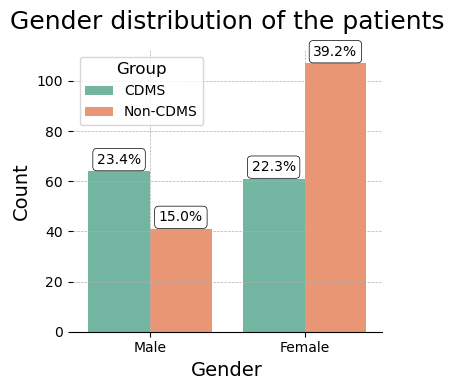

In [22]:
count_plot(visualization_df, "Gender", "Gender distribution of the patients", hue = True)

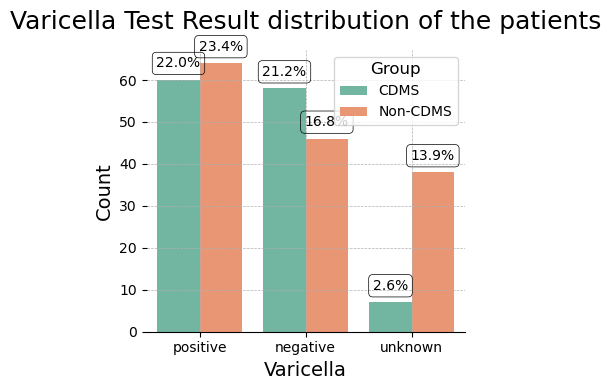

In [23]:
count_plot(visualization_df, "Varicella", "Varicella Test Result distribution of the patients")

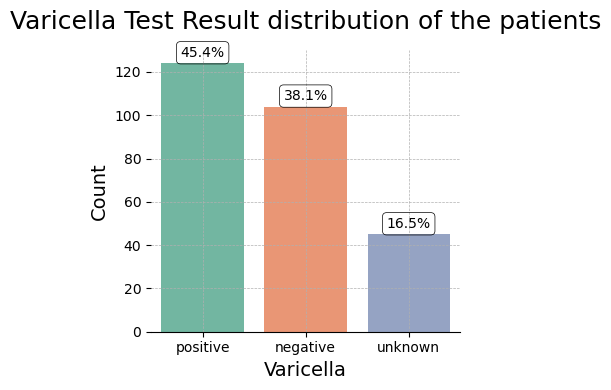

In [24]:
count_plot(visualization_df, "Varicella", "Varicella Test Result distribution of the patients", hue = False)

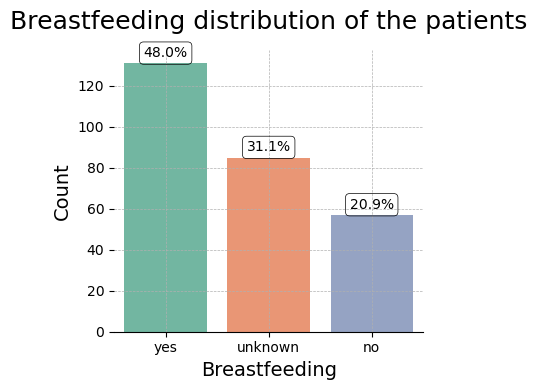

In [25]:
count_plot(visualization_df, "Breastfeeding", "Breastfeeding distribution of the patients", hue = False)

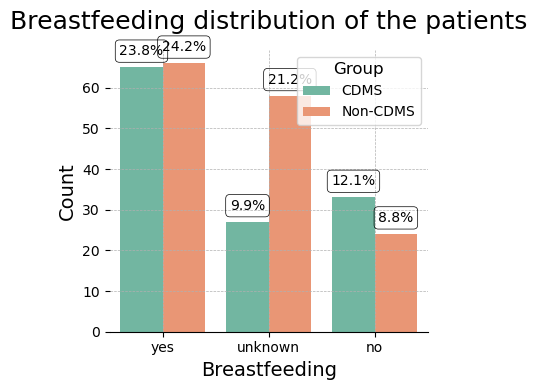

In [26]:
count_plot(visualization_df, "Breastfeeding", "Breastfeeding distribution of the patients", hue = True)

In [27]:
# Calculate the distribution of the 'group' variable
unique_val_count = subset_df['group'].value_counts(normalize=True).mul(100).round(1)
print(unique_val_count)

unique_val_count = unique_val_count.to_frame(name='Distribution of the unique value in "group" variable (%)')
unique_val_count = unique_val_count.style.background_gradient(cmap='Blues', subset=pd.IndexSlice[:, 'Distribution of the unique value in "group" variable (%)'])
unique_val_count = unique_val_count.format({'Distribution of the unique value in "group" variable (%)': '{:.2f}'})

unique_val_count

2    54.2
1    45.8
Name: group, dtype: float64


,"Distribution of the unique value in ""group"" variable (%)"
2,54.20
1,45.80


So now we are balancing both groups 1 and 2 by using Smote Technique

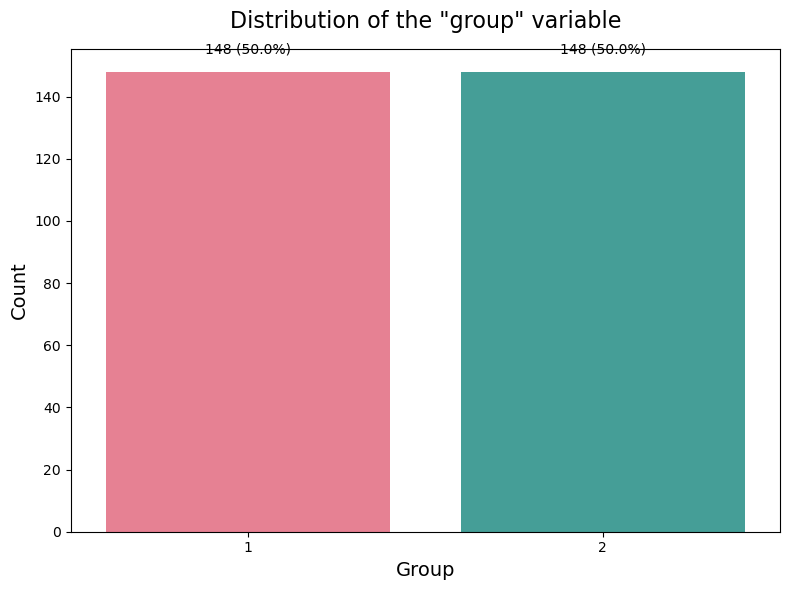

In [28]:
# Import necessary libraries 
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(subset_df.drop('group', axis=1), subset_df['group'])

# Creating a new DataFrame with balanced data
balanced_dataset = pd.concat([X_resampled, y_resampled], axis=1)

# Calculate the distribution of the 'group' variable
unique_val_count_ = balanced_dataset['group'].value_counts()

# Set a custom color palette
palette = sns.color_palette("husl", len(unique_val_count_))

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=unique_val_count_.index, y=unique_val_count_.values, palette=palette)

# Add a title to the plot
ax.set_title('Distribution of the "group" variable', fontsize=16, pad=15)

# Add labels and adjust font sizes
plt.xlabel('Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add number labels above each bar with percentage information
total = len(balanced_dataset)
for i, v in enumerate(unique_val_count_.values):
    percentage = '{:.1f}%'.format((v / total) * 100)
    ax.text(i, v + 5, f'{v} ({percentage})', ha='center', va='bottom', fontsize=10)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


In [29]:
balanced_dataset

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.000000,1,1,2.000000,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.000000,3,2,10.000000,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.000000,3,1,3.000000,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.000000,1,1,7.000000,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.000000,2,1,6.000000,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,36,15.000000,1,1,3.057798,1,0,0,0,0,0,1,0,0,0,1
292,1,46,10.689865,1,1,13.563288,2,1,0,0,0,0,1,0,0,0,1
293,2,39,12.000000,1,1,2.614583,1,0,0,0,0,0,1,0,0,0,1
294,1,37,12.047899,2,2,2.015966,1,0,0,0,0,0,1,0,0,0,1


## Rank the features using PCA

In [30]:
# Import necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the "ID" column from balanced_dataset
#balanced_dataset.drop(["ID"], axis=1, inplace=True)

# Standardize the data using StandardScaler
standardized_balanced_dataset = StandardScaler().fit_transform(balanced_dataset)

# Perform PCA on the standardized data
pca = PCA()
principalComponents = pca.fit_transform(standardized_balanced_dataset)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative sum of eigenvalues
cum_sum_eigenvalues = np.cumsum(explained_variance_ratio)

# Create a DataFrame to store feature names and their corresponding explained variance ratios
feature_ranking_pca = pd.DataFrame({
    'Feature': balanced_dataset.columns,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative eigenvalues': cum_sum_eigenvalues
})

# Sort the features based on their explained variance ratios in descending order
feature_ranking_pca = feature_ranking_pca.sort_values('Explained Variance Ratio', ascending=False)

print("Feature Ranking with PCA:")
print(feature_ranking_pca)



Feature Ranking with PCA:
                    Feature  Explained Variance Ratio  Cumulative eigenvalues
0                    Gender                  0.185401                0.185401
1                       Age                  0.103672                0.289073
2                 Schooling                  0.088768                0.377841
3             Breastfeeding                  0.079234                0.457075
4                 Varicella                  0.071896                0.528971
5           Initial_Symptom                  0.068704                0.597675
6   Mono_or_Polysymptomatic                  0.058597                0.656272
7         Oligoclonal_Bands                  0.055218                0.711490
8                    LLSSEP                  0.050554                0.762044
9                    ULSSEP                  0.045669                0.807713
10                      VEP                  0.039445                0.847158
11                     BAEP           

In [31]:
# Set a threshold for cumulative sum of eigenvalues
# the reason Why I am putting 0.85 is that I want to balance between information loss and dimensionality reduction
threshold = 0.85

# Select the features with a cumulative sum of eigenvalues below the threshold
feature_ranking_pca[feature_ranking_pca["Cumulative eigenvalues"] <= threshold]

,Feature,Explained Variance Ratio,Cumulative eigenvalues
0,Gender,0.185401,0.185401
1,Age,0.103672,0.289073
2,Schooling,0.088768,0.377841
3,Breastfeeding,0.079234,0.457075
4,Varicella,0.071896,0.528971
5,Initial_Symptom,0.068704,0.597675
6,Mono_or_Polysymptomatic,0.058597,0.656272
7,Oligoclonal_Bands,0.055218,0.711490
8,LLSSEP,0.050554,0.762044
9,ULSSEP,0.045669,0.807713


In [32]:
# Select the top-k features based on explained variance ratio
#these features are most important in capturing the variability in your data.
k = len(feature_ranking_pca[feature_ranking_pca["Cumulative eigenvalues"] <= threshold])  

# Number of top-ranked features to select
top_features = feature_ranking_pca.head(k)['Feature'].tolist()
print(top_features)
print()

# Create a subset DataFrame with the top-ranked features
new_df = subset_df[top_features]

# Print the top-ranked features and the subset DataFrame
print("Top-ranked Features:")
print(feature_ranking_pca.head(k))

print("Subset DataFrame:")
new_df

['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP']

Top-ranked Features:
                    Feature  Explained Variance Ratio  Cumulative eigenvalues
0                    Gender                  0.185401                0.185401
1                       Age                  0.103672                0.289073
2                 Schooling                  0.088768                0.377841
3             Breastfeeding                  0.079234                0.457075
4                 Varicella                  0.071896                0.528971
5           Initial_Symptom                  0.068704                0.597675
6   Mono_or_Polysymptomatic                  0.058597                0.656272
7         Oligoclonal_Bands                  0.055218                0.711490
8                    LLSSEP                  0.050554                0.762044
9                    ULSSEP                

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP
0,1,34,20.0,1,1,2.0,1,0,1,1,0
1,1,61,25.0,3,2,10.0,2,1,1,0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0
3,2,41,15.0,1,1,7.0,2,1,0,1,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0
269,1,21,15.0,3,3,5.0,2,1,0,0,0
270,2,19,12.0,3,3,13.0,2,0,1,1,1
271,2,32,15.0,3,3,15.0,2,1,1,1,1


## Rank the features using Random Forest

In [33]:
#The Random Forest algorithm has ranked the features based on their importance in predicting the target variable (group).
# Separate the features (X) and the target variable (y)
X = balanced_dataset.drop('group', axis=1)
y = balanced_dataset['group']

# Rank features using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their corresponding explained variance ratios
feature_ranking_RF = pd.DataFrame({
    'Feature': X.columns,
    'Feature_Importances': feature_importances,
})

print(feature_ranking_pca)
print()

# Sort the features based on their explained variance ratios in descending order
feature_ranking_RF = feature_ranking_RF.sort_values('Feature_Importances', ascending=False)
feature_ranking_RF

                    Feature  Explained Variance Ratio  Cumulative eigenvalues
0                    Gender                  0.185401                0.185401
1                       Age                  0.103672                0.289073
2                 Schooling                  0.088768                0.377841
3             Breastfeeding                  0.079234                0.457075
4                 Varicella                  0.071896                0.528971
5           Initial_Symptom                  0.068704                0.597675
6   Mono_or_Polysymptomatic                  0.058597                0.656272
7         Oligoclonal_Bands                  0.055218                0.711490
8                    LLSSEP                  0.050554                0.762044
9                    ULSSEP                  0.045669                0.807713
10                      VEP                  0.039445                0.847158
11                     BAEP                  0.037059           

,Feature,Feature_Importances
5,Initial_Symptom,0.175579
12,Periventricular_MRI,0.165957
1,Age,0.111750
2,Schooling,0.083393
14,Infratentorial_MRI,0.069283
4,Varicella,0.061665
3,Breastfeeding,0.056644
7,Oligoclonal_Bands,0.049911
0,Gender,0.045792
10,VEP,0.031474


## Split the data into train and test (80-20)

In [34]:
#LazyPredict simplifies the initial phase of the machine learning workflow by automating the process of building,
#&training, and evaluating multiple models
from lazypredict.Supervised import LazyClassifier

X = balanced_dataset.drop("group", axis = 1)
Y = balanced_dataset["group"]

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models,prediction = clf.fit(X_train, X_test, Y_train, Y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.20it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.88,0.88,0.88,0.25
AdaBoostClassifier,0.87,0.87,0.87,0.87,0.17
NuSVC,0.85,0.85,0.85,0.85,0.03
QuadraticDiscriminantAnalysis,0.83,0.83,0.83,0.83,0.02
LogisticRegression,0.83,0.83,0.83,0.83,0.02
LabelSpreading,0.83,0.83,0.83,0.83,0.03
LabelPropagation,0.83,0.83,0.83,0.83,0.04
LGBMClassifier,0.83,0.83,0.83,0.83,0.27
SVC,0.83,0.83,0.83,0.83,0.02


In [35]:
# Initialize different base models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()

# Train each base model on the training set
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
gradient_boosting.fit(X_train, Y_train)
ada_boost.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
logistic_regression.fit(X_train, Y_train)

# Evaluate the performance of each model on the test set
dt_accuracy = round(accuracy_score(Y_test, decision_tree.predict(X_test)), 2)
rf_accuracy = round(accuracy_score(Y_test, random_forest.predict(X_test)), 2)
svc_accuracy = round(accuracy_score(Y_test, svc.predict(X_test)), 2)
gb_accuracy = round(accuracy_score(Y_test, gradient_boosting.predict(X_test)), 2)
ada_accuracy = round(accuracy_score(Y_test, ada_boost.predict(X_test)), 2)
knn_accuracy = round(accuracy_score(Y_test, knn.predict(X_test)), 2)
lr_accuracy = round(accuracy_score(Y_test, logistic_regression.predict(X_test)), 2)

"Within everything that has been predicted as a positive, precision counts the percentage that is correct"
dt_precision = round(precision_score(Y_test, decision_tree.predict(X_test)), 2)

"Within everything that actually is positive, how many did the model succeed to find"
dt_recall = round(recall_score(Y_test, decision_tree.predict(X_test)), 2) 

dt_f1 = round(f1_score(Y_test, decision_tree.predict(X_test)), 2)

# Print the evaluation metrics for each model
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVC Accuracy:", svc_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ada_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.85
SVC Accuracy: 0.63
Gradient Boosting Accuracy: 0.8
AdaBoost Accuracy: 0.87
KNN Accuracy: 0.7
Logistic Regression Accuracy: 0.83


## Use grid search/random search

In [36]:
# define model
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
"""
We will optimize the solver, the penalty, and the C hyperparameters of the model with discrete distributions 
for the solver and penalty type and a log-uniform distribution from 1e-5 to 100 for the C value.
"""

# define Random search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, Y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8055555555555555
Best Hyperparameters: {'C': 2.0674811789304073, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
# define model
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define Grid search
search_ = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result_ = search.fit(X, Y)
# summarize result
print('Best Score: %s' % result_.best_score_)
print('Best Hyperparameters: %s' % result_.best_params_)

Best Score: 0.8055555555555555
Best Hyperparameters: {'C': 2.0674811789304073, 'penalty': 'l2', 'solver': 'liblinear'}


## Use ensembling techniques

In [35]:
#Ensemble learning combines predictions from multiple models: 
#hard voting uses majority rule,while soft voting considers probabilities. 
#The code demonstrates how these ensemble methods predict outcomes on a test dataset.

from sklearn.ensemble import VotingClassifier
svc = SVC(probability=True)

# Voting Classifier with the individual models
voting_classifier_hard = VotingClassifier(
    estimators=[        
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('svc', svc),
        ('gradient_boosting', gradient_boosting),
        ('ada_boost', ada_boost),
        ('knn', knn)],voting = "hard"
)

# Train the VotingClassifier on the training data
voting_classifier_hard.fit(X_train, Y_train)

print("Hard Voting Classifier:")
print(voting_classifier_hard.predict(X_test))
print()

voting_classifier_soft = VotingClassifier(
    estimators=[        
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('svc', svc),
        ('gradient_boosting', gradient_boosting),
        ('ada_boost', ada_boost),
        ('knn', knn)],voting = "soft"
)

# Train the VotingClassifier on the training data
voting_classifier_soft.fit(X_train, Y_train)

print("Soft Voting Classifier:")
print(voting_classifier_soft.predict(X_test))
print()

voting_classifier_3 = VotingClassifier(
    estimators=[        
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('svc', svc),
        ('gradient_boosting', gradient_boosting),
        ('ada_boost', ada_boost),
        ('knn', knn)],voting = "soft", weights=[1,1,1,2,2,1], flatten_transform=True
)

# Train the VotingClassifier on the training data
voting_classifier_3.fit(X_train, Y_train)

print("Soft Flattern Voting Classifier:")
print(voting_classifier_3.predict(X_test))

Hard Voting Classifier:
[1 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 1 1 2 2 1 1 1 2 1
 1 2 1 2 2 2 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 2 2]

Soft Voting Classifier:
[1 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 1 1 2 2 1 1 1 2 1
 1 2 1 2 2 2 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 2 2]

Soft Flattern Voting Classifier:
[1 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 1 1 2 2 1 1 1 2 1
 1 2 1 2 2 2 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 2 2]


## Plot the test set using only two principal components

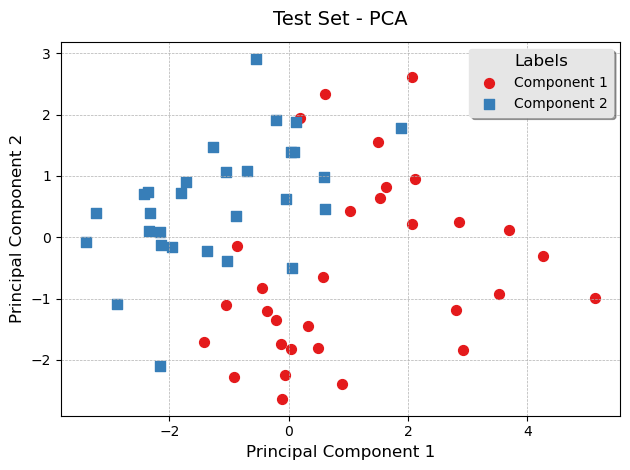

In [36]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Perform PCA on the scaled test set
pca = PCA(n_components=2)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

# Get the predicted labels from the VotingClassifier
predicted_labels = voting_classifier_hard.predict(X_test)

# Plot the test set using the two principal components
unique_labels = set(predicted_labels)
colors = plt.cm.Set1.colors[:len(unique_labels)]  # Using a different colormap for distinct colors

# Define marker shapes for each label
markers = ['o', 's', '^', 'd', 'p', 'h', 'v', '>', '<']

# Scatter plot of each component with respective label color and marker shape
for idx, (label, color) in enumerate(zip(unique_labels, colors)):
    plt.scatter(X_test_pca[predicted_labels == label, 0],
                X_test_pca[predicted_labels == label, 1],
                color=color,
                label=f'Component {label}',
                s=50,  # Adjusting marker size
                marker=markers[idx % len(markers)])  # Using different marker shapes

# Customize legend with more advanced features
legend = plt.legend(title='Labels', loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.9')  # Adjusting legend frame color
frame.set_edgecolor('0.9')  # Adjusting legend edge color
plt.setp(legend.get_title(), fontsize='large')  # Adjusting legend title font size

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Test Set - PCA', fontsize=14, pad=12)  # Adding padding to the title
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid lines with linestyle and linewidth

plt.tight_layout()  # Adjusting layout for better visualization
plt.show()
#visualizes the predictions of the ensemble model on the test data first two principal components,
#These are new variables created to capture the maximum variance in a dataset, helping reduce its dimensionality

## Use the concept of pipeline

In [37]:
# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# The steps of the pipeline
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegressionCV(max_iter=1000)) 
    # Use LogisticRegressionCV for logistic regression with built-in cross-validation 
    # It gives us metrics to understand how well the model predicts outcomes on the test data.
]

# Creating the pipeline
pipeline = Pipeline(pipeline_steps)

# Fit the pipeline on training data
pipeline.fit(X_train, Y_train)

# Predictions using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

Accuracy: 0.983
Precision: 0.968
Recall: 1.0
F1-score: 0.984
